### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 1
### Due: Saturday, Jan 30th at 11.59pm CST
---

## Problem 1

Practice your git and GitHub skills by submitting this homework via GitHub.  You can skip Steps 1-4 if you have already completed the in-class work of Lecture 1.  Steps 5-11 are the new steps.  

1) Navigate to https://github.com/VanderbiltAstronomy/astr_8070_s21 on your browser. **Don't clone this!** Instead, look to the rop right of the page for an option to fork the repository. Do this now. This will make a copy of the class repository for your own personal use.

2) Now that you have a fork of the repository, clone it to your machine.

    $ git clone https://github.com/YOUR_USERNAME/astr_8070_s21

3) Add the original `VanderbiltAstronomy` repository as an `upstream` repository to your fork. First, list the current configured remote repository for your fork with:

    $ git remote -v
    
Now, add the `VanderbiltAstronomy` repo as an upstream:

    $ git remote add upstream https://github.com/VanderbiltAstronomy/astr_8070_s21
    
Verify that the new repository shows as an `upstream` by running `git remote -v` again.

4) Get used to syncing upstream content to your fork with:

    $ git fetch upstream
    
    $ git checkout main
    
    $ git merge upstream/main

5) Now, navigate to `coursework/student_folders` folder. Make a folder in here labeled by your name in all lowercase(i.e. `firstname_lastname`).

6) Copy your completed lecture notebooks (with all exercises in red finished) to your folder, adding your name to the file (e.g. `Lecture_1b_FirstnameLastname.ipynb`). This is what you will do for each week's lecture notebooks to get participation credit. Your lecture notebooks should have already been copies of my base lecture notebooks. **Never** run my base notebooks; always make a personal copy for yourself.

7) Copy the **Homework 1** notebook (this file) to your folder, adding your name (e.g. `vu_astr8070_s21_hw1_FirstnameLastname.ipynb`) 

8) Complete the other problems listed below.

9) Submit your homework as follows (making sure that your added files are contained within your student folder):

    $ git add vu_astr8070_s21_hw1_FirstnameLastname.ipynb
    
    $ git commit -a -m "Uploaded Homework 1"
    
    $ git push
   
10) Similarly add, commit, and push your completed lecture notebooks. 

11) On your browser, navigate on GitHub to your fork of the course repository. You should see an option to initiate a `pull request` to merge your changes into the `main` repository. Your homework and lecture notebooks for the week are submitted when you initiate this pull request.

## Problem 2



Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

1) *(To get you started)* If the first child is male, then the only unknown is the sex of the second child. We want the second child to be female, which has a probability of 0.5. Thus, $p(F,M |C_1=M) = 0.5$. 

2) $p(F,F |C=F)$ = The possible combinations that has at least one female child are (FM, FF, MF). Only FF will give the probability of two females.  $p(FF|C=F) = 1/3$

3) $p(F,F |C_1=F)$ = Given that the older shild is female. The next female has a 0.5 probability. $P(FF|C_1=F) = 1/2$ 

Probability Tree: 



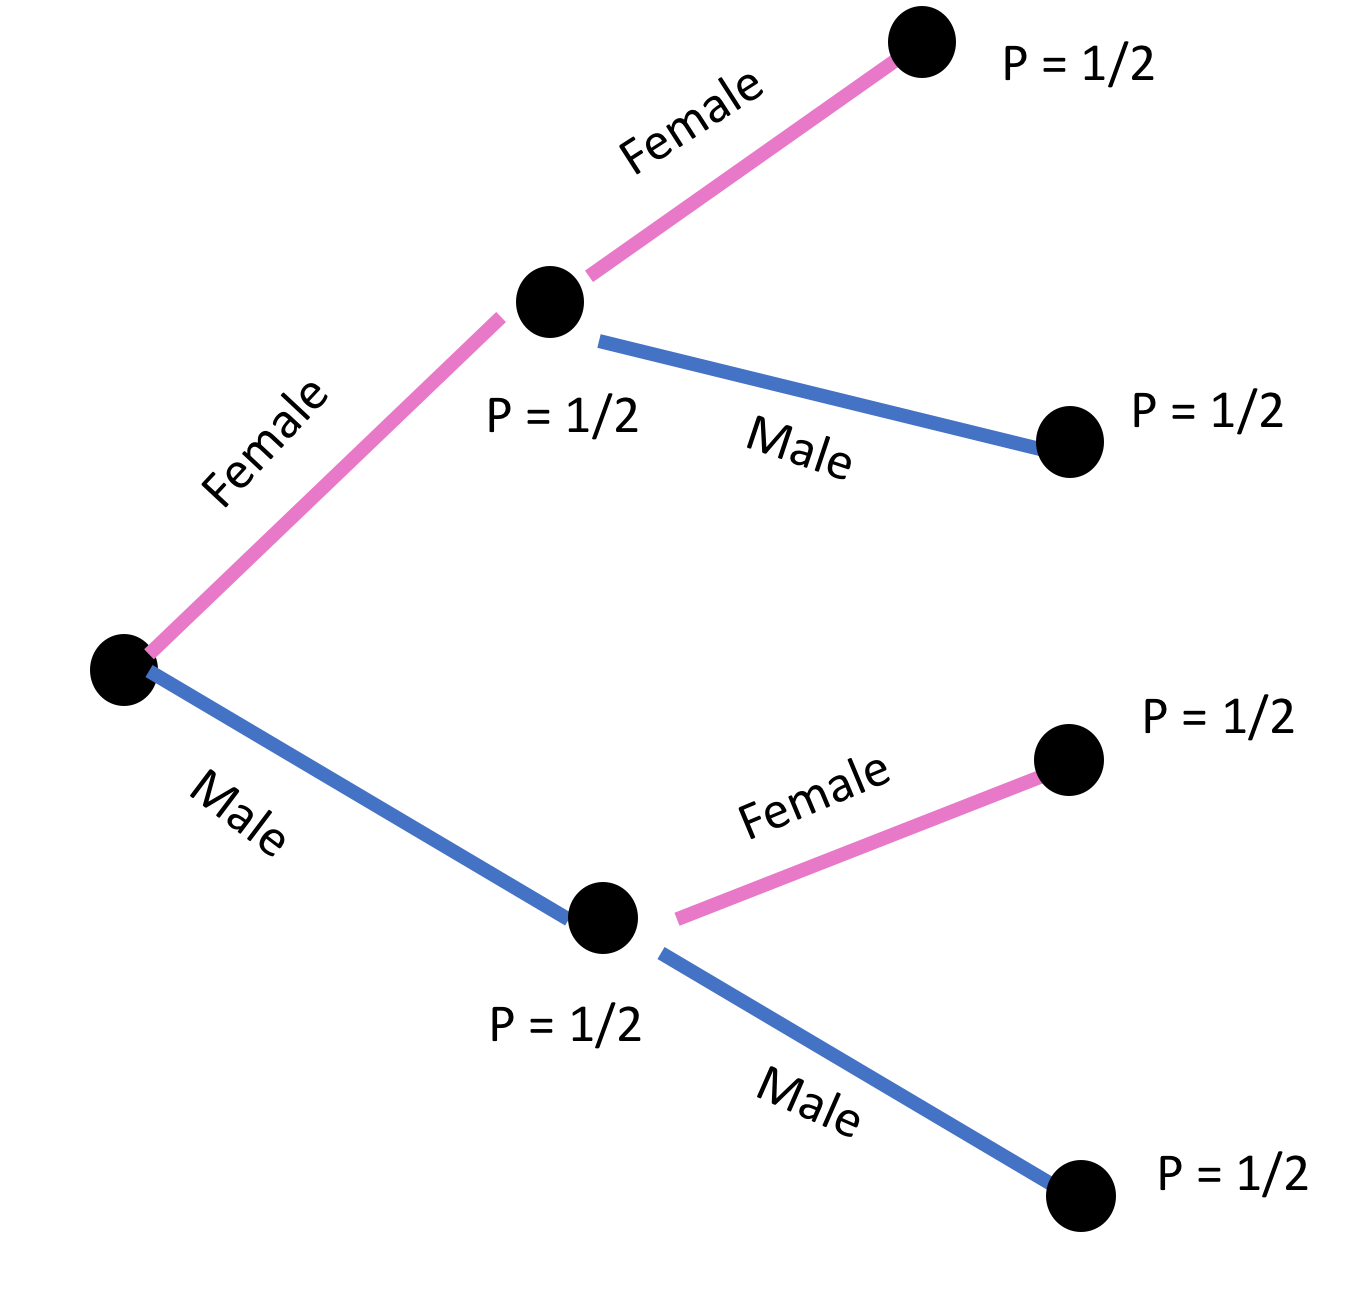

## Problem 3

1) Use `numpy` to draw $1000$ random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.

2) Use matplotlib to make a histogram of these samples. Try to make this as aesthetically pleasing as possible (within reason).

3) Compute the base-10 log of your array $x$, and store this as $y$.

4) Make another histogram for $y$. Using the equation to transform probability distributions in `Lecture_2`, write here what the theoretical pdf of $y$ is, and overplot it onto your histogram.

5) Compute the mean of $x$ and the mean of $y$. Now compute the median of $x$ and the median of $y$. You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.

### Solution

Mean of x : 5.020926470454114
Mean of y base 10 log  : 0.5689608215078472
Mean of y to the power of 10 : : 3.7064728351127787

Median of x : 5.060888693166504
Median of y base 10 log : 0.704226781381111
Median of y to the power of 10 : 5.060888642338502


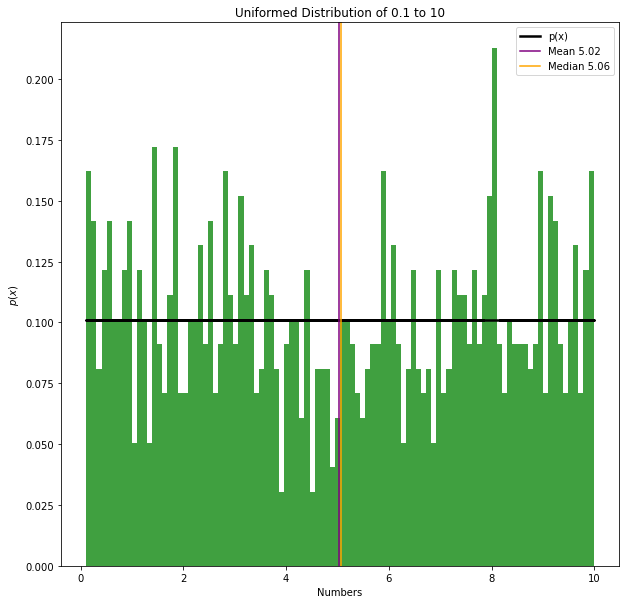

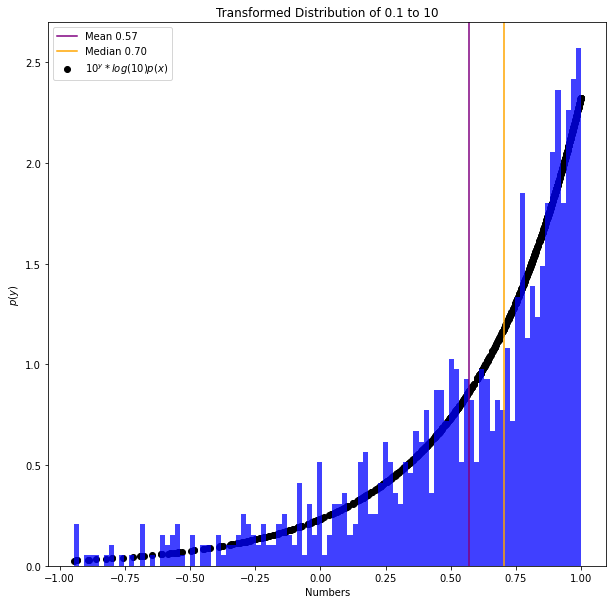

In [104]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

#1000 random numbers from 0.1 to 10 
x = np.random.uniform(0.1,10,1000)
#print(x)

fig = plt.figure(figsize=(10, 10))
uniform_plt = fig.add_subplot(111)

#n, bins, patches = plt.hist(x, 100, facecolor='blue', alpha=0.75) # Frequecy y axis 
n, bins, patches = uniform_plt.hist(x, 100, density=True, facecolor='green', alpha=0.75) # Probability Y axis 
uniform_plt.set_title('Uniformed Distribution of 0.1 to 10')
uniform_plt.set_xlabel('Numbers')
uniform_plt.set_ylabel(r'$p(x)$')


#p(x) = 1/(b-a)
p_x = 1/(10-0.1)*np.ones(1000)
uniform_plt.plot(x,p_x, color = 'k', lw=2.5, label = r'p(x)')
uniform_plt.axvline(np.mean(x), label = 'Mean {:.2f}'.format(np.mean(x)), color = 'purple')
uniform_plt.axvline(np.median(x), label = 'Median {:.2f}'.format(np.median(x)), color = 'orange')
uniform_plt.legend(loc="upper right")



y = np.log10(x)
#print(y)


fig = plt.figure(figsize=(10, 10))
transform_plt = fig.add_subplot(111)

n2, bins2, patches2 = transform_plt.hist(y, 100, density = True, facecolor='blue', alpha=0.75) # Probability Y axis 
transform_plt.set_title('Transformed Distribution of 0.1 to 10')
transform_plt.set_xlabel('Numbers')
transform_plt.set_ylabel(r'$p(y)$')


#p(y) = (dy/dx)^{-1}p(x)
#p(log_10(x) = (dx/d(log_10(x))))^{-1}p(x)
#p(log_10(x)) = [1/x*log(10)]^-1 p(x)

#p(log_10(x)) = x*log(10) p(x)
#p_y = x*y p(x)


#p_y =  x * np.log(10)
#p_y = 10^y * np.log(10)
p_y = x*np.log(10)*p_x


transform_plt.scatter(y, p_y, color = 'black', label = r'$10^y * log(10) p(x)$')
transform_plt.axvline(np.mean(y), label = 'Mean {:.2f}'.format(np.mean(y)), color = 'purple')
transform_plt.axvline(np.median(y), label = 'Median {:.2f}'.format(np.median(y)), color = 'orange')
transform_plt.legend(loc="upper left")


print('Mean of x : ' + str(np.mean(x)))
print('Mean of y base 10 log  : ' + str(np.mean(y)))
print('Mean of y to the power of 10 : : ' + str(10**np.mean(y)))

print('')
print('Median of x : ' + str(np.median(x)))
print('Median of y base 10 log : ' + str(np.median(y)))
print('Median of y to the power of 10 : ' + str(10**np.median(y)))


To calculate the probability distribution fuction (pdf) of $y = log_{10}(x) $

$p(y) = (dy/dx)^{-1}p(x)$

$p(log_{10}(x) = (dx/d(log_{10}(x))))^{-1}p(x)$

$p(log_{10}(x)) = [1/x*log(10)]^{-1} p(x)$

$p(log_{10}(x)) = x*log(10) p(x)$

$p(y) = x*y *p(x)$


